In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [37]:

#데이터 특성을 보기 위해 시각화
data=pd.read_csv('corr 최종구글없음 시계열.csv',encoding='utf-8',names=['day','covid_num'])
data=data[1:]
data['covid_num']=data['covid_num'].astype('int')

data['day']=pd.to_datetime(data['day'])
print(data.info())
#sns.pairplot(data=data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 1 to 394
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   day        394 non-null    datetime64[ns]
 1   covid_num  394 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 4.7 KB
None


In [41]:
data['split'] = np.random.randn(data.shape[0], 1)

msk = np.random.rand(len(data)) <= 0.7

train = data[msk]
test = data[~msk]

In [42]:
train

,day,covid_num,split
3,2019-11-22,0,1.277031
4,2019-11-23,0,1.102554
5,2019-11-24,0,0.074297
7,2019-11-26,0,0.066679
8,2019-11-27,0,1.239136
...,...,...,...
387,2020-12-10,682,-0.030724
389,2020-12-12,950,-0.527876
390,2020-12-13,1030,-0.234390
391,2020-12-14,718,-0.331353


<function matplotlib.pyplot.show(close=None, block=None)>

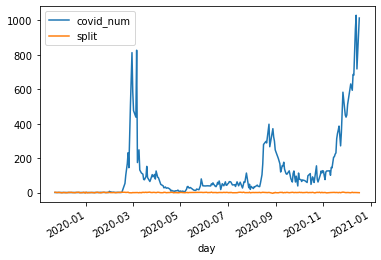

In [43]:
train.index=train['day']
train.set_index('day',inplace=True)
train.plot()
plt.show

In [44]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train.covid_num.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1477.825
Method:                       css-mle   S.D. of innovations             65.130
Date:                Mon, 21 Dec 2020   AIC                           2967.650
Time:                        19:15:56   BIC                           2989.106
Sample:                             1   HQIC                          2976.271
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7133      3.452      1.076      0.282      -3.052      10.478
ar.L1.D.y      0.6595      0.069      9.541      0.000       0.524       0.795
ar.L2.D.y     -0.5874      0.074     -7.987      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


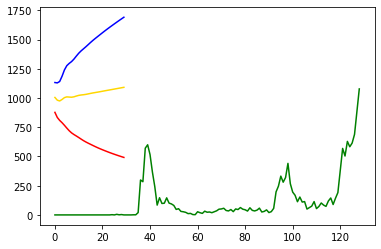

In [48]:
forecast_data = model_fit.forecast(steps=30) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.



pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = test.covid_num.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.